In [2]:
# %%
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Enable inline plotting in Jupyter
%matplotlib inline


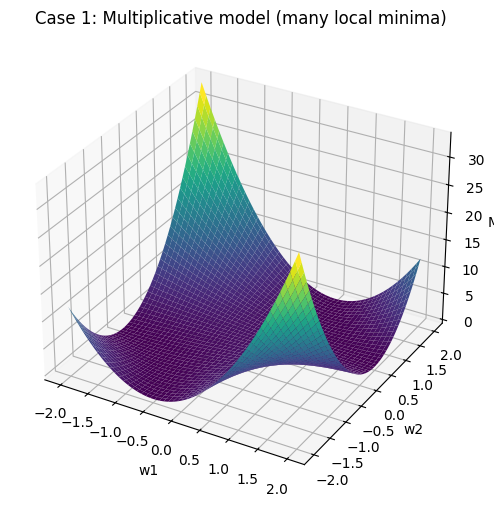

In [3]:
# %%
# CASE 1: Multiplicative parameters (2-layer simple model)
# Model: y_hat = w1 * w2 * x
x = np.linspace(0, 2, 50)
y = 1.0 * x  # target linear

w1_range = np.linspace(-2, 2, 200)
w2_range = np.linspace(-2, 2, 200)
W1, W2 = np.meshgrid(w1_range, w2_range)

# Compute MSE
MSE1 = np.mean((W1 * W2 * x[:, None, None] - y[:, None, None])**2, axis=0)

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, MSE1, cmap='viridis', edgecolor='none')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('MSE')
ax.set_title('Case 1: Multiplicative model (many local minima)')
plt.show()


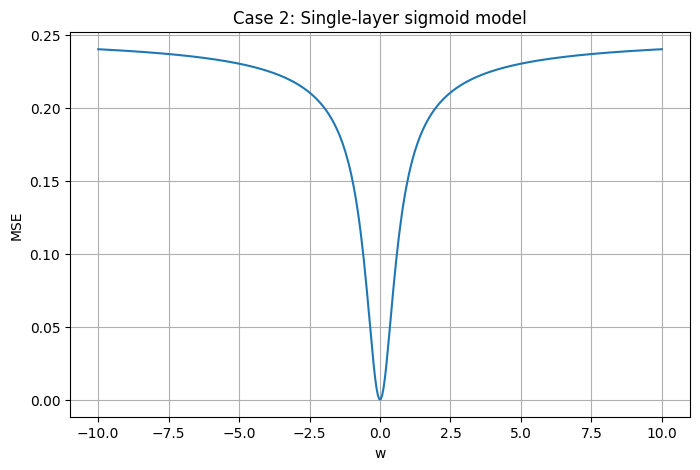

In [5]:
# %%
# CASE 2: Single-layer nonlinearity (sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-5, 5, 100)
y = 0.5 * np.ones_like(x)  # target

w_range = np.linspace(-10, 10, 400)
MSE2 = [np.mean((sigmoid(w * x) - y)**2) for w in w_range]

# 2D plot (still shows hills/valleys due to nonlinearity)
plt.figure(figsize=(8,5))
plt.plot(w_range, MSE2)
plt.title('Case 2: Single-layer sigmoid model')
plt.xlabel('w')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


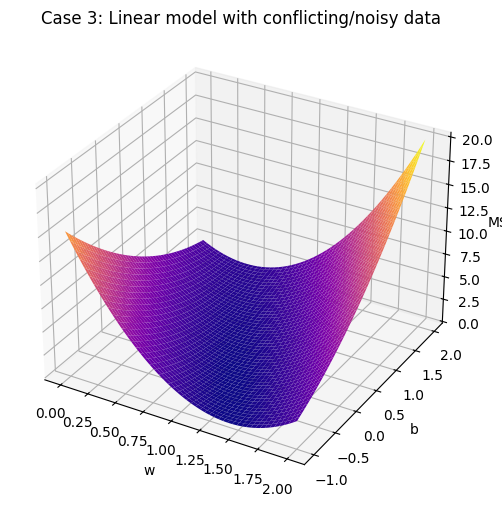

In [6]:
# %%
# CASE 3: Linear model with conflicting/noisy data (produces gentle valleys)
# Model: y_hat = w*x + b
x = np.array([1, 2, 3, 4])
y = np.array([1, 2, 2.5, 5])  # noisy/conflicting

w_range = np.linspace(0, 2, 200)
b_range = np.linspace(-1, 2, 200)
W, B = np.meshgrid(w_range, b_range)

MSE3 = np.mean((W * x[:, None, None] + B - y[:, None, None])**2, axis=0)

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, MSE3, cmap='plasma', edgecolor='none')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('MSE')
ax.set_title('Case 3: Linear model with conflicting/noisy data')
plt.show()
